In [2]:
### Multiple regression ###
import pandas as pd

#load file from working directory
advertising = pd.read_csv("advertising.csv", sep = ",", 
                          encoding = "ISO-8859-1")

import statsmodels
import statsmodels.api as sm
X = advertising[['TV', 'Radio', 'Press']]
y = advertising['Sales']
X = sm.add_constant(X)
advert_model = sm.OLS(y, X).fit()

advert_model.summary()

C:\Users\u4033\AppData\Roaming\Python\Python35\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.06e-55
Time:                        13:51:17   Log-Likelihood:                -1602.1
No. Observations:                 250   AIC:                             3212.
Df Residuals:                     246   BIC:                             3226.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -188.1357     50.851     -3.700      0.000    -288.294     -87.977
TV             4.1822      0.297     14.094      0.000       3.598       4.767
Radio         63.5738      4.752     13.378      0.000      54.214      72.934
Press         32.6501      6.864      4.757      0.000      19.130      46.170
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.811
Skew:                          -0.199   Prob(JB):                        0.404
Kurtosis:                       2.876   Cond. No.                         408.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

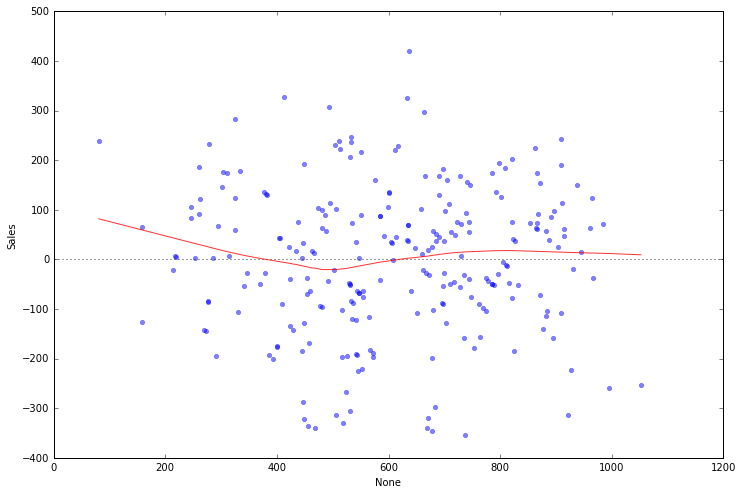

In [3]:
### Residuals ###

import seaborn as sns
import matplotlib.pyplot as plt

# if using Jupyter Notebooks also include this line which
# will print graphs to screen
%matplotlib inline

fitted_values = advert_model.fittedvalues
residual_plot = plt.figure(1)
residual_plot.set_figheight(8)
residual_plot.set_figwidth(12)

residual_plot.axes[0] = sns.residplot(fitted_values, 'Sales',
data=advertising, lowess=True, 
scatter_kws={'alpha': 0.5},
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

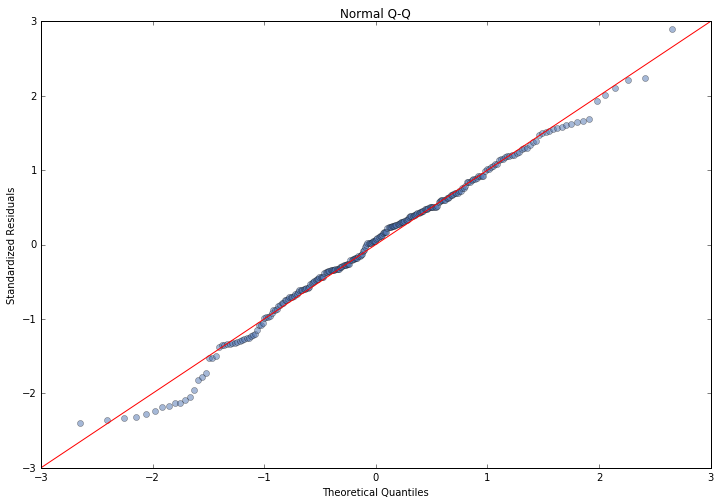

In [5]:
### QQ plots ###

from statsmodels.graphics.gofplots import ProbPlot
import numpy as np

norm_residuals = advert_model.get_influence().resid_studentized_internal

QQ = ProbPlot(norm_residuals)

qq_plot = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0',
lw=1)

qq_plot.set_figheight(8)
qq_plot.set_figwidth(12)

qq_plot.axes[0].set_title('Normal Q-Q')
qq_plot.axes[0].set_xlabel('Theoretical Quantiles')
qq_plot.axes[0].set_ylabel('Standardized Residuals');

In [6]:
### Variance Inflation Factor ###
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])], index=X.columns)

const    29.497591
TV        1.004873
Radio     1.044969
Press     1.049925
dtype: float64

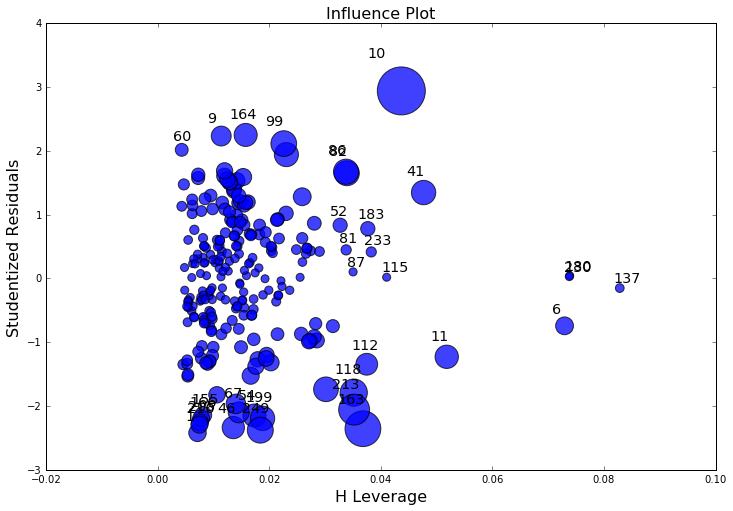

In [8]:
### Influence plot ###

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(advert_model, ax=ax,
    criterion="cooks")